In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import weibull_min
import numpy as np
%run util.py

def get_outliers(data, atribut):
    Q1 = myQ1(data, atribut)
    Q3 = myQ3(data, atribut)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[atribut] < lower_bound) | (data[atribut] > upper_bound)]

def changeOutliers(data, atribut):
    # Mengganti outliers dengan nilai median
    Q1 = myQ1(data, atribut)
    Q3 = myQ3(data, atribut)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data.loc[(data[atribut] < lower_bound) | (data[atribut] > upper_bound), atribut] = data[atribut].median()
    return data

# Mengganti outliers dengan nilai median
DATA = changeOutliers(DATA, "battery_power")
DATA = changeOutliers(DATA, "clock_speed")
DATA = changeOutliers(DATA, "ram")
DATA = changeOutliers(DATA, "n_cores")
DATA = changeOutliers(DATA, "use_time")
DATA = changeOutliers(DATA, "px_width")
DATA = changeOutliers(DATA, "px_height")
DATA = changeOutliers(DATA, "5g")
DATA = changeOutliers(DATA, "price")

data = DATA['px_width']

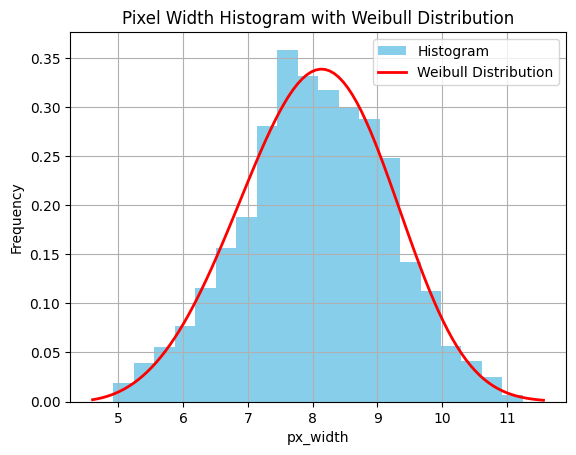

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Data


# Plot histogram
plt.hist(data, bins=20, density=True, histtype='bar', align='mid', color='skyblue', label='Histogram')

# Fit a Weibull distribution to the data
shape, loc, scale = weibull_min.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = weibull_min.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', linewidth=2, label='Weibull Distribution')

plt.xlabel('px_width')
plt.ylabel('Frequency')
plt.title('Pixel Width Histogram with Weibull Distribution')
plt.legend()
plt.grid(True)
plt.show()


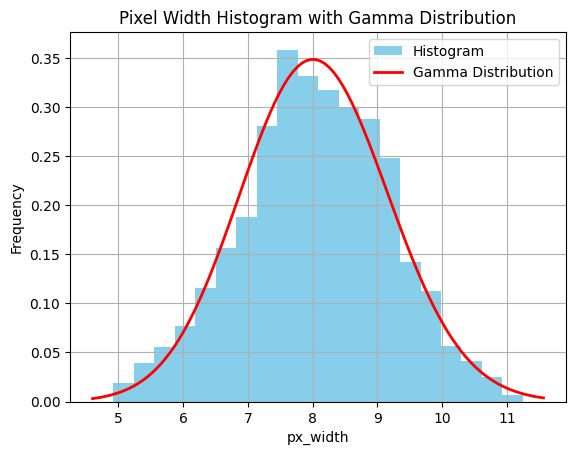

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Data


# Plot histogram
plt.hist(data, bins=20, density=True, histtype='bar', align='mid', color='skyblue', label='Histogram')

# Fit a gamma distribution to the data
shape, loc, scale = gamma.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', linewidth=2, label='Gamma Distribution')

plt.xlabel('px_width')
plt.ylabel('Frequency')
plt.title('Pixel Width Histogram with Gamma Distribution')
plt.legend()
plt.grid(True)
plt.show()


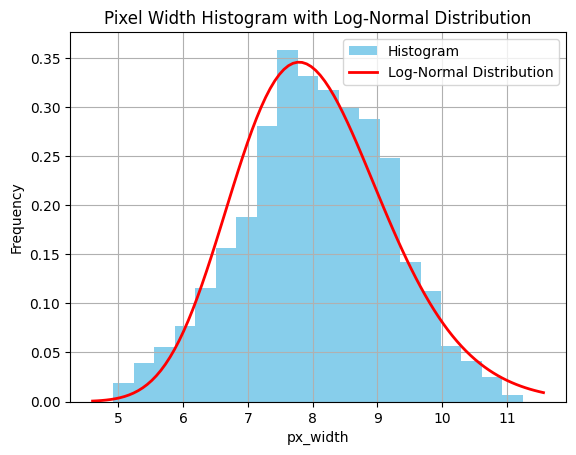

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Datas

# Plot histogram
plt.hist(data, bins=20, density=True, histtype='bar', align='mid', color='skyblue', label='Histogram')

# Fit a log-normal distribution to the data
shape, loc, scale = lognorm.fit(data, floc=0)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', linewidth=2, label='Log-Normal Distribution')

plt.xlabel('px_width')
plt.ylabel('Frequency')
plt.title('Pixel Width Histogram with Log-Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()


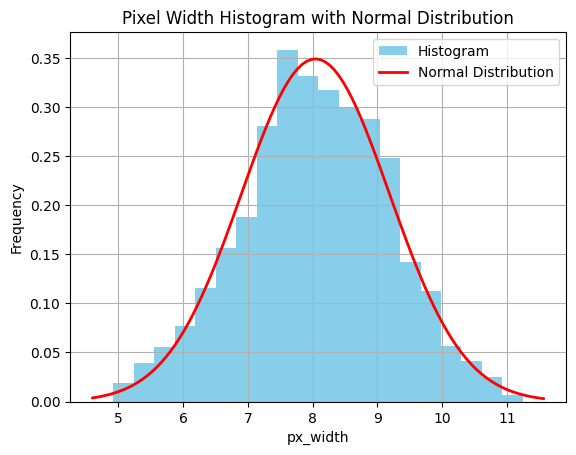

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data
# Plot histogram
plt.hist(data, bins=20, density=True, histtype='bar', align='mid', color='skyblue', label='Histogram')

# Fit a normal distribution to the data
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', linewidth=2, label='Normal Distribution')

plt.xlabel('px_width')
plt.ylabel('Frequency')
plt.title('Pixel Width Histogram with Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()


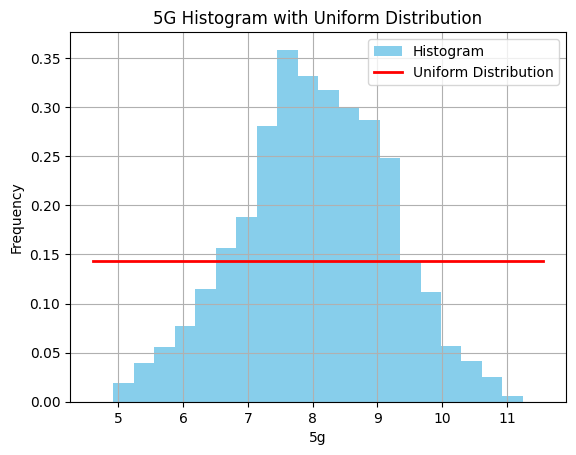

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Data
# Plot histogram
plt.hist(data, bins=20, density=True, histtype='bar', align='mid', color='skyblue', label='Histogram')

# Fit a uniform distribution to the data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = uniform.pdf(x, xmin, xmax - xmin)
plt.plot(x, pdf, 'r-', linewidth=2, label='Uniform Distribution')

plt.xlabel('5g')
plt.ylabel('Frequency')
plt.title('5G Histogram with Uniform Distribution')
plt.legend()
plt.grid(True)
plt.show()
